In [2]:
!pip install category_encoders

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import category_encoders as ce
from sklearn.feature_selection import f_regression, VarianceThreshold, mutual_info_classif, SelectKBest
from sklearn.feature_selection import SelectFromModel
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Loading the data

In [4]:
melb_data = pd.read_csv('melb_data.csv.zip')
melb_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [5]:
print(melb_data.columns)
print("There are are {} features in the Melbourne Dataset".format(len(melb_data.columns)))

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')
There are are 21 features in the Melbourne Dataset


In [6]:
melb_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [7]:
melb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [8]:
melb_data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [9]:
#Handling NaN values in 'Car' column, filling them with their mean value
melb_data['Car'].fillna(round(melb_data['Car'].mean()), inplace=True)
melb_data['BuildingArea'].fillna(melb_data['BuildingArea'].mean(), inplace=True)
melb_data['YearBuilt'].fillna(round(melb_data['YearBuilt'].mean()), inplace=True)
melb_data['CouncilArea'].fillna(method='ffill', inplace=True)

In [10]:
melb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13580 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   13580 non-null  float64
 15  YearBuilt      13580 non-null  float64
 16  CouncilArea    13580 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [11]:
#All null values have been removed
melb_data.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [12]:
melb_data.shape

(13580, 21)

In [13]:
#Checking the datatype of different features present in the dataset
melb_data.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [14]:
#Finding the number of numerical features
numeric_data = melb_data.select_dtypes(include=[np.number])
#Finding the number of categorical features
categorical_data = melb_data.select_dtypes(exclude=[np.number])
#Number of numerical and categorical features
print("There are {0} numerical features and {1} categorical features in the Melbourne dataset".
      format(numeric_data.shape[1], categorical_data.shape[1]))

There are 13 numerical features and 8 categorical features in the Melbourne dataset


In [15]:
print("Numerical data columns are:")
print(numeric_data.columns)
print("Categorical data columns are:")
print(categorical_data.columns)

Numerical data columns are:
Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount'],
      dtype='object')
Categorical data columns are:
Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')


In [16]:
#Splitting the data into X and y
X = melb_data.drop(['Price', 'Date', 'Address'], axis=1)
y = melb_data['Price']
#Split into training and testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print("Number of samples in training data {}".format(x_train.shape[0]))
print("Number of samples in testing data {}".format(x_test.shape[0]))

Number of samples in training data 10185
Number of samples in testing data 3395


In [17]:
X_copy = X.copy(deep=True)
y_copy = y.copy(deep=True)
encoder = ce.OrdinalEncoder(cols=['Suburb', 'Type', 'Method', 'SellerG', 'CouncilArea', 'Regionname'])
X_copy = encoder.fit_transform(X_copy)

# Feature engineering

In [21]:
#Encoding the categorical data into machine readable format
encoder = ce.OrdinalEncoder(cols=['Suburb', 'Type', 'Method', 'SellerG', 'CouncilArea',
       'Regionname'])
x_train_enc = encoder.fit_transform(x_train)
x_test_enc = encoder.transform(x_test)
X_enc = encoder.fit_transform(X)

In [22]:
#The categorical features have been converted to machine readable form
x_train_enc.head()

,Suburb,Rooms,Type,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
11958,1,4,1,1,1,20.6,3064.0,4.0,2.0,2.0,512.0,200.71000,2007.0,1,-37.58505,144.93592,1,15510.0
5667,2,1,2,2,2,3.3,3141.0,1.0,1.0,0.0,0.0,47.00000,1970.0,2,-37.84370,144.99040,2,14887.0
12263,3,2,3,1,3,6.7,3058.0,2.0,2.0,1.0,1965.0,103.00000,2000.0,3,-37.73615,144.97455,1,11204.0
12809,4,3,1,3,4,15.5,3167.0,3.0,1.0,2.0,660.0,151.96765,1965.0,3,-37.92745,145.08276,3,3692.0
3219,5,1,2,3,5,4.6,3122.0,1.0,1.0,1.0,0.0,44.00000,2014.0,4,-37.82220,145.03290,2,11308.0


In [23]:
x_train_enc = np.asarray(x_train_enc)
x_test_enc = np.asarray(x_test_enc)
y_train = np.asarray(y_train).ravel()
y_test = np.asarray(y_test).ravel()


# Feature Selection

## Filter Methods

### ANOVA F-value

In [24]:
f_value = f_regression(x_train_enc, y_train)
#f_classif returns F-value and p-values as well
#print(f_value)
#Print name and F-value of each feature
print("The F values are:")
for feature in zip(X.columns, f_value[0]):
  print(feature)
print("-"*50)
print("The p values are: ")
for feature in zip(X.columns, f_value[1]):
  print(feature)

The F values are:
('Suburb', 144.3357137987823)
('Rooms', 3255.730586964472)
('Type', 1054.9098546546243)
('Method', 35.569585228628476)
('SellerG', 29.709740778105335)
('Distance', 260.0206661948133)
('Postcode', 105.81626494249068)
('Bedroom2', 2879.3553029815757)
('Bathroom', 2691.808906329171)
('Car', 583.0926144891721)
('Landsize', 21.322419183908078)
('BuildingArea', 37.36010155146897)
('YearBuilt', 778.0680466122465)
('CouncilArea', 164.3896708151641)
('Lattitude', 464.47104244221885)
('Longtitude', 430.6263089434591)
('Regionname', 119.129218014993)
('Propertycount', 19.159988695063138)
--------------------------------------------------
The p values are: 
('Suburb', 5.0151771311998306e-33)
('Rooms', 0.0)
('Type', 2.787518685106134e-220)
('Method', 2.5428394299135406e-09)
('SellerG', 5.1352955192555794e-08)
('Distance', 8.796645152765723e-58)
('Postcode', 1.0684215075838167e-24)
('Bedroom2', 0.0)
('Bathroom', 0.0)
('Car', 2.5461565316659586e-125)
('Landsize', 3.929198450452865e-

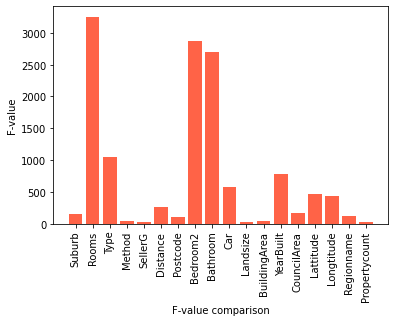

In [25]:
#Plotting a F-value comparison bar-plot
plt.bar(x=X.columns, height=np.asarray(f_value[0]), color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel('F-value')
plt.xlabel('F-value comparison')
plt.show()

### Variance Threshold

In [26]:
selector = VarianceThreshold()
#Perform variance threshold
selector.fit_transform(x_train_enc)
#Print the name and the variance of each feature
for feature in zip(X.columns, selector.variances_):
  print(feature)

('Suburb', 305.0)
('Rooms', 0.917027528764012)
('Type', 0.40723662802705674)
('Method', 1.2631211733639502)
('SellerG', 245.0)
('Distance', 35.070834216383254)
('Postcode', 977.0)
('Bedroom2', 0.9429777877069982)
('Bathroom', 0.47655390494313715)
('Car', 0.9276676622397284)
('Landsize', 75100.0)
('BuildingArea', 44515.0)
('YearBuilt', 188.0)
('CouncilArea', 32.0)
('Lattitude', 0.006251643280649329)
('Longtitude', 0.010865281404032643)
('Regionname', 2.4889346211436)
('Propertycount', 21401.0)


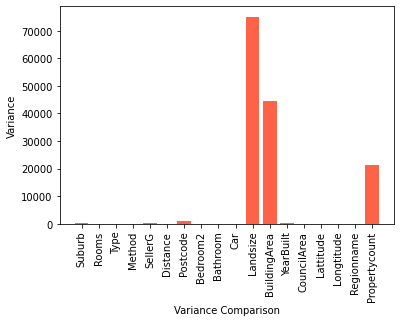

In [27]:
#Plotting a bar graph
plt.bar(x=X.columns, height=selector.variances_, color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel('Variance')
plt.xlabel('Variance Comparison')
plt.show()

In [28]:
selector = VarianceThreshold(threshold=0.2)
#Transform the dataset according to the variance threshold
x_train_new = selector.fit_transform(x_train_enc)
print('Number of features before variance thresholding: {}'.format(x_train_enc.shape[1]))
print('Number of features after variance thresholding: {}'.format(x_train_new.shape[1]))

Number of features before variance thresholding: 18
Number of features after variance thresholding: 16


### Mutual Information

In [29]:
#Create mutual_info_classif object to calculate mutual information
MI_score = mutual_info_classif(x_train_enc, y_train, random_state=42)
for feature in zip(X.columns, MI_score):
    print(feature)

('Suburb', 0.06060097888493754)
('Rooms', 0.5400334319287419)
('Type', 1.3255406837391783)
('Method', 1.3068679053072474)
('SellerG', 0.055572431438214664)
('Distance', 0.060184219891636026)
('Postcode', 0.1272095444656376)
('Bedroom2', 0.48730958927193235)
('Bathroom', 0.8586037166117988)
('Car', 0.6005669266683302)
('Landsize', 0.12648274340959542)
('BuildingArea', 0.35207128191204085)
('YearBuilt', 0.20091717312626312)
('CouncilArea', 0.11888215167935012)
('Lattitude', 0.11020675515496947)
('Longtitude', 0.1005237645049144)
('Regionname', 0.44838494825024533)
('Propertycount', 0.04738901971318743)


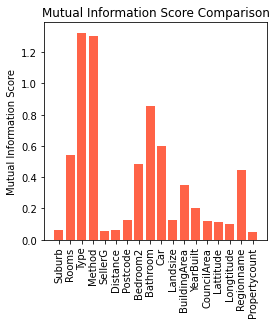

In [30]:
plt.figure(figsize=(4,4))
plt.bar(x=X.columns, height=MI_score, color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel('Mutual Information Score')
plt.title('Mutual Information Score Comparison')
plt.show()

### Using Selector Object for Selecting Features

In [31]:
skb = SelectKBest(score_func=f_regression, # Set f_classif as our criteria to select features
                  k=2)                    # Select top two features based on the criteria
# Train and transform the dataset according to the SelectKBest
x_data_new = skb.fit_transform(x_train_enc ,y_train)
print('Number of features before feature selection: {}'.format(x_train_enc.shape[1]))
print('Number of features after feature selection: {}'.format(x_data_new.shape[1]))
#Top two features have been selected by the SelectKBest method according to f_regression function

Number of features before feature selection: 18
Number of features after feature selection: 2


## Wrapper Methods

### Exhaustive Feature Selection (EFS)

In [32]:
#Checking the accuracy of Linear regression before Exhaustive Feature Selection (EFS)
lr = LinearRegression()
lr.fit(x_train_enc, y_train)
print("The r2_score of Linear regression before feature selection is: {}".format(
      r2_score(y_test, lr.predict(x_test_enc))))

The r2_score of Linear regression before feature selection is: 0.58205731223489


In [33]:
#Create an EFS object
efs = EFS(estimator=lr,        #Using Linear Regression as estimator
          min_features=1,      #The minimum number of features to consider is 1
          max_features=6,      #The maximum number of features to consider is 6
          scoring='r2')        #The metric to use to evaluate the estimator is r2_score                 
#Train EFS with our dataset
efs = efs.fit(x_train_enc, y_train)
print('Best accuracy score: %.2f' % efs.best_score_) #best_score_ shows the best score 
print('Best subset (indices):', efs.best_idx_)       #best_idx_ shows the index of features that yield the best score 

Features: 31179/31179

Best accuracy score: 0.51
Best subset (indices): (1, 2, 5, 8, 14, 15)


In [34]:
x_train_new = efs.transform(x_train_enc)
print('Number of features before transformation: {}'.format(x_train_enc.shape[1]))
print('Number of features after transformation: {}'.format(x_train_new.shape[1]))

Number of features before transformation: 18
Number of features after transformation: 6


In [35]:
#Useful columns in the Melborne dataset as selected from EFS method are:
useful_col = list(efs.best_feature_names_)
col_list = X.columns
for x in useful_col:
  print(col_list[int(x)])

Rooms
Type
Distance
Bathroom
Lattitude
Longtitude


## Embedded Methods

### Random Forest Regressor

In [36]:
#Before using feature selection
randomforest = RandomForestRegressor(n_estimators=500, random_state=42)
randomforest.fit(x_train_enc, y_train)
print("The r2_score before applying RandomForestRegressor: {}".
      format(r2_score(y_test, randomforest.predict(x_test_enc))))

The r2_score before applying RandomForestRegressor: 0.8226109918062539


In [37]:
np.mean(randomforest.feature_importances_)

0.05555555555555555

In [38]:
#Using RandomForestClassifier to find the best features in our dataset
randomforest = RandomForestRegressor(n_estimators=500, random_state=42)
sfm = SelectFromModel(estimator=randomforest, #We are going to use RandomForestClassifier
                      threshold=0.03)         #Threshold value to be used for feature selection
sfm = sfm.fit(x_train_enc, y_train)

In [39]:
x_train_new = sfm.transform(x_train_enc)
x_test_new = sfm.transform(x_test_enc)
x_train_new.shape


(10185, 9)

In [40]:
#Accuracy of RandomForestRegressor after transforming x_train_enc
randomforest = RandomForestRegressor(n_estimators=500, random_state=42)
randomforest.fit(x_train_new, y_train)
print("The r2_score after feature selection is: {}".format(r2_score(y_test, randomforest.predict(x_test_new))))

The r2_score after feature selection is: 0.8214103726559625


#### GridSearchCV

In [44]:
#We can further fine-tune RandomForestRegressor using GridSearchCV
rfc_grid ={
    'n_estimators':[100,200, 300, 350, 400, 450, 500],
    'max_depth': list(np.arange(start=10, stop=25)),
    'max_features': ['auto', 'sqrt', 'log2'],
}
rfc = GridSearchCV(estimator=RandomForestRegressor(), param_grid=rfc_grid,
                   n_jobs=-1, verbose=3, scoring='r2')

In [45]:
rfc.fit(x_train_new, y_train)

Fitting 5 folds for each of 315 candidates, totalling 1575 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed: 19.6min
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed: 36.8min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 63.3min
[Parallel(n_jobs=-1)]: Done 1148 tasks      | elapsed: 96.2min
[Parallel(n_jobs=-1)]: Done 1564 tasks      | elapsed: 137.7min
[Parallel(n_jobs=-1)]: Done 1575 out of 1575 | elapsed: 138.8min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

In [46]:
rfc.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=21, max_features='log2', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=450, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [47]:
randomforest = rfc.best_estimator_
randomforest.fit(x_train_new, y_train)
print("The r2_score after performing GridSearchCV is: {}".format(r2_score(y_test, randomforest.predict(x_test_new))))

The r2_score after performing GridSearchCV is: 0.8318906405683635


### Decision Tree Regressor

In [48]:
decisiontree = DecisionTreeRegressor()
decisiontree.fit(x_train_enc, y_train)
print("The r2_score before applying feature engineering using DecisionTreeRegressor: {}".
      format(r2_score(y_test, decisiontree.predict(x_test_enc))))

The r2_score before applying feature engineering using DecisionTreeRegressor: 0.5519221370821259


In [49]:
#Using DecisionTreeRegressor to find the best features in our dataset
decisiontree = DecisionTreeRegressor(random_state=42)
sfm = SelectFromModel(estimator=decisiontree) #We are going to use DecisionTreeRegressor
sfm = sfm.fit(x_train_enc, y_train)

In [50]:
selected=[]
print('The most important features based on DecisionTreeRegressor:')
for feature_list_index in sfm.get_support(indices=True):
    selected.append(X.columns[feature_list_index])
    print('- ' + X.columns[feature_list_index])

The most important features based on DecisionTreeRegressor:
- Rooms
- Type
- Distance
- Postcode
- Landsize
- Longtitude


In [51]:
x_train_new = sfm.transform(x_train_enc)
x_test_new = sfm.transform(x_test_enc)
x_train_new.shape

(10185, 6)

In [52]:
#Accuracy of DecisionTreeRegressor after transforming x_train_enc
decisiontree = DecisionTreeRegressor()
decisiontree.fit(x_train_new, y_train)
print("The r2_score after using feature selection is: {}".
      format(r2_score(y_test, decisiontree.predict(x_test_new))))

The r2_score after using feature selection is: 0.5793963616780904


#### GridSearchCV

In [53]:
dt_grid = {
    'criterion': ['mse', 'mae', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': list(np.arange(start=1, stop=15)),
    'max_features': ['auto', 'sqrt', 'log2']
}
dtr = GridSearchCV(estimator=DecisionTreeRegressor(),
                  param_grid=dt_grid,
                  scoring='r2',
                  n_jobs=-1)
dtr.fit(x_train_new, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
           

In [54]:
dtr.best_params_

{'criterion': 'mae',
 'max_depth': 8,
 'max_features': 'auto',
 'splitter': 'best'}

In [55]:
decisiontree=dtr.best_estimator_
decisiontree.fit(x_train_new, y_train)
y_pred_dt = decisiontree.predict(x_test_new)
print("The r2 score after using GridSearchCV is {}".format(r2_score(y_test, y_pred_dt)))

The r2 score after using GridSearchCV is 0.6758111133281912


# **`Final Model`**

In [56]:
#Using RandomForestRegressor, since it has got the best r2_score
randomforest = rfc.best_estimator_
print("The average score after using cross validation is: {}".
     format(np.mean(cross_val_score(randomforest, X_copy, y_copy, cv=7))))

The average score after using cross validation is: 0.7826500247211727
